In [2]:
#steps

# 1. Develop a program to detect the number plate from the test images (approximately 100 images) supplied separately.

# 2. Output the image with the Bounding box drawn on the detected number plate.

# 3. Output the number of yellow number plates (light vehicles).

# * It doesn't matter whether you use the computer vision or machine learning or others to achieve the step 1.


# import
# find yellow spots we can try basic hsv function
# convert into grey yaa that should work
# contour and find rectangle shape
# highlight on main image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [4]:
#importing my image
img = cv2.imread('127.jpg')

#trying to recreate image with only yellow color
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower_range = np.array([25,50,50])
# upper_range = np.array([32,255,255])
# mask1 = cv2.inRange(hsv, lower_range, upper_range)
# plt.imshow('ok',mask1)



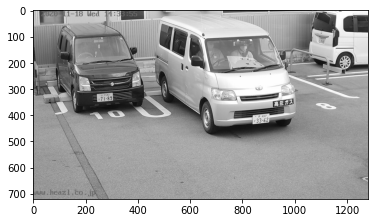

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

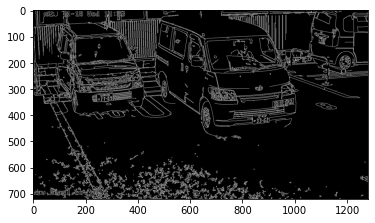

In [7]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[603,  91]],

       [[605, 210]],

       [[655, 228]],

       [[640, 115]]], dtype=int32)

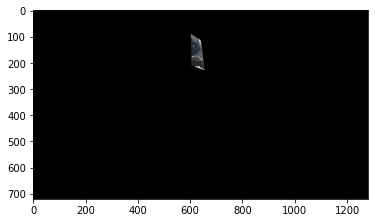

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

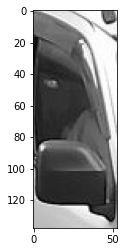

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

In [13]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: list index out of range